In [1]:
#Basic Libraries
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

#Data Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt

#Data Pre-processing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA

#Model Training and Validation
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, roc_curve, classification_report, plot_confusion_matrix

#ML Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier

#Model Export
import joblib
from joblib import dump #from joblib import load > to load .pkl file

In [2]:
df = pd.read_excel('covid19_clinical_dataset.xlsx')
df

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.022340,-0.517413,0.010677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5639,ae66feb9e4dc3a0,3,positive,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5640,517c2834024f3ea,17,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5641,5c57d6037fe266d,4,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5642,c20c44766f28291,10,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
print('>>>> # of unique values in df <<<<')
for i in df:
    print(i, '--->', df[i].nunique())

>>>> # of unique values in df <<<<
Patient ID ---> 5644
Patient age quantile ---> 20
SARS-Cov-2 exam result ---> 2
Patient addmited to regular ward (1=yes, 0=no) ---> 2
Patient addmited to semi-intensive unit (1=yes, 0=no) ---> 2
Patient addmited to intensive care unit (1=yes, 0=no) ---> 2
Hematocrit ---> 176
Hemoglobin ---> 84
Platelets ---> 249
Mean platelet volume  ---> 48
Red blood Cells ---> 211
Lymphocytes ---> 318
Mean corpuscular hemoglobin concentration (MCHC) ---> 57
Leukocytes ---> 475
Basophils ---> 17
Mean corpuscular hemoglobin (MCH) ---> 91
Eosinophils ---> 86
Mean corpuscular volume (MCV) ---> 190
Monocytes ---> 146
Red blood cell distribution width (RDW) ---> 61
Serum Glucose ---> 71
Respiratory Syncytial Virus ---> 2
Influenza A ---> 2
Influenza B ---> 2
Parainfluenza 1 ---> 2
CoronavirusNL63 ---> 2
Rhinovirus/Enterovirus ---> 2
Mycoplasma pneumoniae ---> 0
Coronavirus HKU1 ---> 2
Parainfluenza 3 ---> 2
Chlamydophila pneumoniae ---> 2
Adenovirus ---> 2
Parainfluenza 4

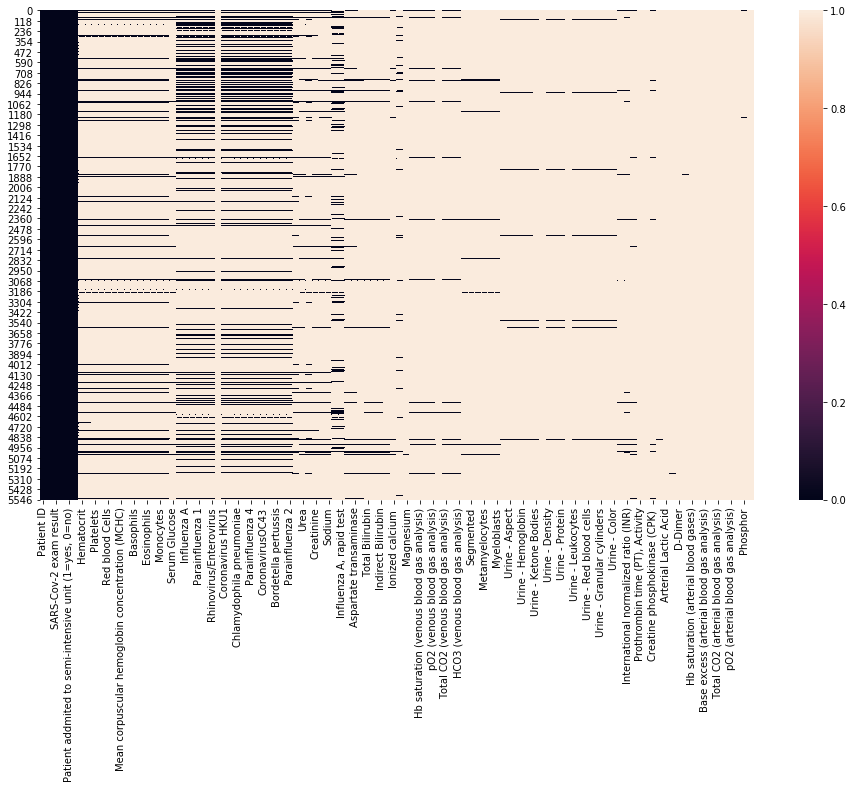

In [4]:
plt.figure(figsize=(16,9))
sns.heatmap(df.isna())

In [5]:
cols = []
for i in df.columns:
    a = i.strip()
    cols.append(a)
df.columns = cols

In [6]:
df.describe()

,Patient age quantile,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
count,5644.000000,5644.000000,5644.000000,5644.000000,6.030000e+02,6.030000e+02,6.020000e+02,5.990000e+02,6.020000e+02,6.020000e+02,...,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.000000e+01,2.000000e+01,2.700000e+01
mean,9.318391,0.013997,0.008859,0.007264,-2.186214e-09,-1.601319e-08,-3.535004e-10,7.438142e-09,8.424447e-09,-7.866736e-09,...,-1.379737e-10,8.416397e-09,-1.655685e-09,4.139211e-10,-7.472139e-09,6.070843e-09,-2.469729e-08,4.656613e-09,6.332993e-09,5.243001e-09
std,5.777903,0.117489,0.093713,0.084929,1.000830e+00,1.000830e+00,1.000832e+00,1.000836e+00,1.000832e+00,1.000832e+00,...,1.019049e+00,1.019049e+00,1.019049e+00,1.019049e+00,1.019049e+00,1.019049e+00,1.019049e+00,1.025978e+00,1.025978e+00,1.019049e+00
min,0.000000,0.000000,0.000000,0.000000,-4.501420e+00,-4.345603e+00,-2.552426e+00,-2.457575e+00,-3.970608e+00,-1.865070e+00,...,-1.999560e+00,-1.244817e+00,-3.082674e+00,-3.568877e+00,-2.925618e+00,-2.985592e+00,-1.175907e+00,-1.532932e+00,-1.480526e+00,-2.900254e+00
25%,4.000000,0.000000,0.000000,0.000000,-5.188074e-01,-5.862439e-01,-6.053457e-01,-6.624832e-01,-5.679496e-01,-7.307069e-01,...,-1.122574e+00,-5.348102e-01,-3.308668e-01,-9.210583e-02,-5.117720e-01,-5.397211e-01,-8.169898e-01,-1.214975e-01,-5.527296e-01,-4.852787e-01
50%,9.000000,0.000000,0.000000,0.000000,5.340703e-02,4.031596e-02,-1.217160e-01,-1.015171e-01,1.385207e-02,-1.426696e-02,...,2.677689e-01,-2.120799e-01,-1.181667e-02,2.942021e-01,7.743482e-02,5.633191e-02,-1.599549e-01,-1.174366e-02,-1.381825e-01,1.826928e-01
75%,14.000000,0.000000,0.000000,0.000000,7.171751e-01,7.295320e-01,5.314981e-01,6.838353e-01,6.661759e-01,5.976919e-01,...,7.383496e-01,2.305214e-02,6.661649e-01,5.115003e-01,4.385609e-01,5.085100e-01,4.500090e-01,-1.174366e-02,2.763648e-01,5.937525e-01
max,19.000000,1.000000,1.000000,1.000000,2.662704e+00,2.671868e+00,9.532034e+00,3.713052e+00,3.645706e+00,3.764100e+00,...,1.337265e+00,3.236524e+00,1.703078e+00,1.042674e+00,1.940087e+00,2.029471e+00,2.205371e+00,2.841856e+00,2.862350e+00,1.826932e+00


In [7]:
df.columns

Index(['Patient ID', 'Patient age quantile', 'SARS-Cov-2 exam result',
       'Patient addmited to regular ward (1=yes, 0=no)',
       'Patient addmited to semi-intensive unit (1=yes, 0=no)',
       'Patient addmited to intensive care unit (1=yes, 0=no)', 'Hematocrit',
       'Hemoglobin', 'Platelets', 'Mean platelet volume',
       ...
       'Hb saturation (arterial blood gases)',
       'pCO2 (arterial blood gas analysis)',
       'Base excess (arterial blood gas analysis)',
       'pH (arterial blood gas analysis)',
       'Total CO2 (arterial blood gas analysis)',
       'HCO3 (arterial blood gas analysis)',
       'pO2 (arterial blood gas analysis)', 'Arteiral Fio2', 'Phosphor',
       'ctO2 (arterial blood gas analysis)'],
      dtype='object', length=110)

In [8]:
for i in df.columns:
    print('#######',i,'#######')
    if df[i].nunique()>15:
        print(df[i].describe())
    else:
        print(df[i].unique())

####### Patient ID #######
count                5644
unique               5644
top       86d5a4dc540b173
freq                    1
Name: Patient ID, dtype: object
####### Patient age quantile #######
count    5644.000000
mean        9.318391
std         5.777903
min         0.000000
25%         4.000000
50%         9.000000
75%        14.000000
max        19.000000
Name: Patient age quantile, dtype: float64
####### SARS-Cov-2 exam result #######
['negative' 'positive']
####### Patient addmited to regular ward (1=yes, 0=no) #######
[0 1]
####### Patient addmited to semi-intensive unit (1=yes, 0=no) #######
[0 1]
####### Patient addmited to intensive care unit (1=yes, 0=no) #######
[0 1]
####### Hematocrit #######
count    6.030000e+02
mean    -2.186214e-09
std      1.000830e+00
min     -4.501420e+00
25%     -5.188074e-01
50%      5.340703e-02
75%      7.171751e-01
max      2.662704e+00
Name: Hematocrit, dtype: float64
####### Hemoglobin #######
count    6.030000e+02
mean    -1.601319e-0

count    1.440000e+02
mean    -2.037268e-09
std      1.003490e+00
min     -9.590281e-01
25%     -6.088295e-01
50%     -3.576001e-01
75%      5.350256e-02
max      3.882848e+00
Name: Alkaline phosphatase, dtype: float64
####### Ionized calcium #######
count    5.000000e+01
mean     1.907349e-08
std      1.010153e+00
min     -2.099957e+00
25%     -7.293370e-01
50%      5.980965e-02
75%      5.582169e-01
max      3.548662e+00
Name: Ionized calcium, dtype: float64
####### Strepto A #######
[nan 'positive' 'negative' 'not_done']
####### Magnesium #######
[        nan  1.07515335 -0.01360926  0.53077167 -0.55799091  2.16391587
 -2.19113564  1.61953497 -1.10237253 -1.64675403]
####### pCO2 (venous blood gas analysis) #######
count    1.360000e+02
mean    -1.935234e-08
std      1.003697e+00
min     -2.705014e+00
25%     -5.466186e-01
50%      1.373409e-02
75%      6.190532e-01
max      5.679521e+00
Name: pCO2 (venous blood gas analysis), dtype: float64
####### Hb saturation (venous blood gas a

####### Arteiral Fio2 #######
[        nan  2.84185624 -0.01174366 -0.45075905 -1.40195894  0.64677942
 -1.53293192 -1.47512817  2.11016393 -0.59709746]
####### Phosphor #######
count    2.000000e+01
mean     6.332993e-09
std      1.025978e+00
min     -1.480526e+00
25%     -5.527296e-01
50%     -1.381825e-01
75%      2.763648e-01
max      2.862350e+00
Name: Phosphor, dtype: float64
####### ctO2 (arterial blood gas analysis) #######
count    2.700000e+01
mean     5.243001e-09
std      1.019049e+00
min     -2.900254e+00
25%     -4.852787e-01
50%      1.826928e-01
75%      5.937525e-01
max      1.826932e+00
Name: ctO2 (arterial blood gas analysis), dtype: float64


In [9]:
df.shape

(5644, 110)

Observations:
    1. 'Mycoplasma pneumoniae', 'Urine - Sugar', 'Partial thromboplastin time (PTT)', 'Prothrombin time (PT), Activity', 'D-Dimer' has only nan values and can be dropped.
    2. 'Parainfluenza 2' has only 'not_detected' and nan values. We can convert 'not_detected' to 0.
    3. 'Patient ID' has unique values and can be dropped.
    4. 'Strepto A', 'Urine - Hemoglobin', 'Urine - Bile pigments', 'Urine - Ketone Bodies' has 'not_done' values.
    5. 'Fio2 (venous blood gas analysis)' and 'Myeloblasts' has nan and 0. values. we will need to analyze 0. values.
    6. 'Urine - pH' is supposed to be float values, but is object due to 'Não Realizado'. Need to check 6 6.5 7 5 5.5.
    7. 'Urine - Nitrite' has nan and 'not_done' values only.
    8. 'Urine - Leukocytes' is supposed to be int values, but is object due to '<1000'.

In [10]:
# Since 'Partial thromboplastin time (PTT)' wasn't recoverable in python, we have removed the column using excel.
df.drop(columns=['Mycoplasma pneumoniae', 'Urine - Sugar', 'Prothrombin time (PT), Activity', 'D-Dimer', 'Patient ID'], axis=1, inplace=True)

In [11]:
cat_df, num_df = [], []
for i in df:
    if df[i].dtype=='O':
        cat_df.append(i)
    elif (df[i].dtypes=='int64') | (df[i].dtypes=='float64') | (df[i].dtypes=='int32'):
        num_df.append(i)
    else: print('Others >', i)
print('>>> Total Number of Features ::', df.shape[1])
print('>>> Number of Categorical Features ::', len(cat_df))
print('>>> Number of Numerical Features ::', len(num_df))

>>> Total Number of Features :: 105
>>> Number of Categorical Features :: 36
>>> Number of Numerical Features :: 69


In [14]:
for i in num_df:
    print('#######',i,'#######')
    if df[i].nunique()>2:
        continue
    else:
        print(df[i].unique())

####### Patient age quantile #######
####### Patient addmited to regular ward (1=yes, 0=no) #######
[0 1]
####### Patient addmited to semi-intensive unit (1=yes, 0=no) #######
[0 1]
####### Patient addmited to intensive care unit (1=yes, 0=no) #######
[0 1]
####### Hematocrit #######
####### Hemoglobin #######
####### Platelets #######
####### Mean platelet volume #######
####### Red blood Cells #######
####### Lymphocytes #######
####### Mean corpuscular hemoglobin concentration (MCHC) #######
####### Leukocytes #######
####### Basophils #######
####### Mean corpuscular hemoglobin (MCH) #######
####### Eosinophils #######
####### Mean corpuscular volume (MCV) #######
####### Monocytes #######
####### Red blood cell distribution width (RDW) #######
####### Serum Glucose #######
####### Neutrophils #######
####### Urea #######
####### Proteina C reativa mg/dL #######
####### Creatinine #######
####### Potassium #######
####### Sodium #######
####### Alanine transaminase #######
####### 

In [15]:
cols = []
print(df.shape[0])
for i in df:
    if df[i].isna().sum() > 5000:
        print(i, '>>>', df[i].isna().sum())
        cols.append(i)
    else: continue
print(len(cols))

5644
Hematocrit >>> 5041
Hemoglobin >>> 5041
Platelets >>> 5042
Mean platelet volume >>> 5045
Red blood Cells >>> 5042
Lymphocytes >>> 5042
Mean corpuscular hemoglobin concentration (MCHC) >>> 5042
Leukocytes >>> 5042
Basophils >>> 5042
Mean corpuscular hemoglobin (MCH) >>> 5042
Eosinophils >>> 5042
Mean corpuscular volume (MCV) >>> 5042
Monocytes >>> 5043
Red blood cell distribution width (RDW) >>> 5042
Serum Glucose >>> 5436
Neutrophils >>> 5131
Urea >>> 5247
Proteina C reativa mg/dL >>> 5138
Creatinine >>> 5220
Potassium >>> 5273
Sodium >>> 5274
Alanine transaminase >>> 5419
Aspartate transaminase >>> 5418
Gamma-glutamyltransferase >>> 5491
Total Bilirubin >>> 5462
Direct Bilirubin >>> 5462
Indirect Bilirubin >>> 5462
Alkaline phosphatase >>> 5500
Ionized calcium >>> 5594
Strepto A >>> 5312
Magnesium >>> 5604
pCO2 (venous blood gas analysis) >>> 5508
Hb saturation (venous blood gas analysis) >>> 5508
Base excess (venous blood gas analysis) >>> 5508
pO2 (venous blood gas analysis) >>

In [16]:
df.drop(columns=cols, axis=1, inplace=True)

In [17]:
cols = []
print(df.shape[0])
for i in df:
    if df[i].isna().sum() > 3:
        print(i, '>>>', df[i].isna().sum())
        cols.append(i)
    else: continue
print(len(cols))

5644
Respiratory Syncytial Virus >>> 4290
Influenza A >>> 4290
Influenza B >>> 4290
Parainfluenza 1 >>> 4292
CoronavirusNL63 >>> 4292
Rhinovirus/Enterovirus >>> 4292
Coronavirus HKU1 >>> 4292
Parainfluenza 3 >>> 4292
Chlamydophila pneumoniae >>> 4292
Adenovirus >>> 4292
Parainfluenza 4 >>> 4292
Coronavirus229E >>> 4292
CoronavirusOC43 >>> 4292
Inf A H1N1 2009 >>> 4292
Bordetella pertussis >>> 4292
Metapneumovirus >>> 4292
Parainfluenza 2 >>> 4292
Influenza B, rapid test >>> 4824
Influenza A, rapid test >>> 4824
19


In [18]:
cat_df, num_df = [], []
for i in df:
    if df[i].dtype=='O':
        cat_df.append(i)
    elif (df[i].dtypes=='int64') | (df[i].dtypes=='float64') | (df[i].dtypes=='int32'):
        num_df.append(i)
    else: print('Others >', i)
print('>>> Total Number of Features ::', df.shape[1])
print('>>> Number of Categorical Features ::', len(cat_df))
print('>>> Number of Numerical Features ::', len(num_df))

>>> Total Number of Features :: 24
>>> Number of Categorical Features :: 20
>>> Number of Numerical Features :: 4


In [19]:
for i in num_df:
    if df[i].isna().sum() > 3:
        print(i, '>>>', df[i].isna().sum())
        a = df[i].mean()
        df[i].fillna(a, inplace=True)
    else: continue

In [20]:
df.isna().sum()

Patient age quantile                                        0
SARS-Cov-2 exam result                                      0
Patient addmited to regular ward (1=yes, 0=no)              0
Patient addmited to semi-intensive unit (1=yes, 0=no)       0
Patient addmited to intensive care unit (1=yes, 0=no)       0
Respiratory Syncytial Virus                              4290
Influenza A                                              4290
Influenza B                                              4290
Parainfluenza 1                                          4292
CoronavirusNL63                                          4292
Rhinovirus/Enterovirus                                   4292
Coronavirus HKU1                                         4292
Parainfluenza 3                                          4292
Chlamydophila pneumoniae                                 4292
Adenovirus                                               4292
Parainfluenza 4                                          4292
Coronavi

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5644 entries, 0 to 5643
Data columns (total 24 columns):
Patient age quantile                                     5644 non-null int64
SARS-Cov-2 exam result                                   5644 non-null object
Patient addmited to regular ward (1=yes, 0=no)           5644 non-null int64
Patient addmited to semi-intensive unit (1=yes, 0=no)    5644 non-null int64
Patient addmited to intensive care unit (1=yes, 0=no)    5644 non-null int64
Respiratory Syncytial Virus                              1354 non-null object
Influenza A                                              1354 non-null object
Influenza B                                              1354 non-null object
Parainfluenza 1                                          1352 non-null object
CoronavirusNL63                                          1352 non-null object
Rhinovirus/Enterovirus                                   1352 non-null object
Coronavirus HKU1                       

In [22]:
df.fillna('Unknown', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5644 entries, 0 to 5643
Data columns (total 24 columns):
Patient age quantile                                     5644 non-null int64
SARS-Cov-2 exam result                                   5644 non-null object
Patient addmited to regular ward (1=yes, 0=no)           5644 non-null int64
Patient addmited to semi-intensive unit (1=yes, 0=no)    5644 non-null int64
Patient addmited to intensive care unit (1=yes, 0=no)    5644 non-null int64
Respiratory Syncytial Virus                              5644 non-null object
Influenza A                                              5644 non-null object
Influenza B                                              5644 non-null object
Parainfluenza 1                                          5644 non-null object
CoronavirusNL63                                          5644 non-null object
Rhinovirus/Enterovirus                                   5644 non-null object
Coronavirus HKU1                       

In [23]:
for i in df:
    print(i, '>>>', df[i].unique())

Patient age quantile >>> [13 17  8  5 15  9 16  1 14 11  0  3 10  6 12 19  7 18  2  4]
SARS-Cov-2 exam result >>> ['negative' 'positive']
Patient addmited to regular ward (1=yes, 0=no) >>> [0 1]
Patient addmited to semi-intensive unit (1=yes, 0=no) >>> [0 1]
Patient addmited to intensive care unit (1=yes, 0=no) >>> [0 1]
Respiratory Syncytial Virus >>> ['Unknown' 'not_detected' 'detected']
Influenza A >>> ['Unknown' 'not_detected' 'detected']
Influenza B >>> ['Unknown' 'not_detected' 'detected']
Parainfluenza 1 >>> ['Unknown' 'not_detected' 'detected']
CoronavirusNL63 >>> ['Unknown' 'not_detected' 'detected']
Rhinovirus/Enterovirus >>> ['Unknown' 'detected' 'not_detected']
Coronavirus HKU1 >>> ['Unknown' 'not_detected' 'detected']
Parainfluenza 3 >>> ['Unknown' 'not_detected' 'detected']
Chlamydophila pneumoniae >>> ['Unknown' 'not_detected' 'detected']
Adenovirus >>> ['Unknown' 'not_detected' 'detected']
Parainfluenza 4 >>> ['Unknown' 'not_detected' 'detected']
Coronavirus229E >>> ['U

In [24]:
df.reset_index(drop=True)

,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,...,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,"Influenza B, rapid test","Influenza A, rapid test"
0,13,negative,0,0,0,Unknown,Unknown,Unknown,Unknown,Unknown,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
1,17,negative,0,0,0,not_detected,not_detected,not_detected,not_detected,not_detected,...,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,negative,negative
2,8,negative,0,0,0,Unknown,Unknown,Unknown,Unknown,Unknown,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
3,5,negative,0,0,0,Unknown,Unknown,Unknown,Unknown,Unknown,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
4,15,negative,0,0,0,not_detected,not_detected,not_detected,not_detected,not_detected,...,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,Unknown,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5639,3,positive,0,0,0,Unknown,Unknown,Unknown,Unknown,Unknown,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
5640,17,negative,0,0,0,Unknown,Unknown,Unknown,Unknown,Unknown,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
5641,4,negative,0,0,0,Unknown,Unknown,Unknown,Unknown,Unknown,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
5642,10,negative,0,0,0,Unknown,Unknown,Unknown,Unknown,Unknown,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown


In [25]:
data = pd.concat([df.iloc[:,2:5]])
data.columns = ['Regular', 'Semi_ICU', 'ICU']

In [26]:
data[(data['Regular']==0) & (data['Semi_ICU']==0) & (data['ICU']==0)]

,Regular,Semi_ICU,ICU
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
5639,0,0,0
5640,0,0,0
5641,0,0,0
5642,0,0,0


In [27]:
data['Ward'] = np.nan
for i in range(0, len(data)):
    if data['Regular'][i]==1:
        data['Ward'][i] = 'Regular'
    elif data['Semi_ICU'][i]==1:
        data['Ward'][i] = 'Semi_ICU'
    elif data['ICU'][i]==1:
        data['Ward'][i] = 'ICU'
    else: data['Ward'][i] = 'Not_Applicable'

In [28]:
data['Ward'].unique()

array(['Not_Applicable', 'Semi_ICU', 'Regular', 'ICU'], dtype=object)

In [29]:
df = pd.concat([df, data], axis=1)

In [30]:
df.drop(columns=['Patient addmited to regular ward (1=yes, 0=no)', 'Patient addmited to semi-intensive unit (1=yes, 0=no)', 'Patient addmited to intensive care unit (1=yes, 0=no)'], axis=1, inplace=True)

In [31]:
df['SARS-Cov-2 exam result'].replace({'negative':0, 'positive':1}, inplace=True)

In [32]:
df

,Patient age quantile,SARS-Cov-2 exam result,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus HKU1,Parainfluenza 3,...,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,"Influenza B, rapid test","Influenza A, rapid test",Regular,Semi_ICU,ICU,Ward
0,13,0,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,0,0,0,Not_Applicable
1,17,0,not_detected,not_detected,not_detected,not_detected,not_detected,detected,not_detected,not_detected,...,not_detected,not_detected,not_detected,not_detected,negative,negative,0,0,0,Not_Applicable
2,8,0,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,0,0,0,Not_Applicable
3,5,0,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,0,0,0,Not_Applicable
4,15,0,not_detected,not_detected,not_detected,not_detected,not_detected,detected,not_detected,not_detected,...,not_detected,not_detected,not_detected,not_detected,Unknown,Unknown,0,0,0,Not_Applicable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5639,3,1,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,0,0,0,Not_Applicable
5640,17,0,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,0,0,0,Not_Applicable
5641,4,0,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,0,0,0,Not_Applicable
5642,10,0,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,0,0,0,Not_Applicable


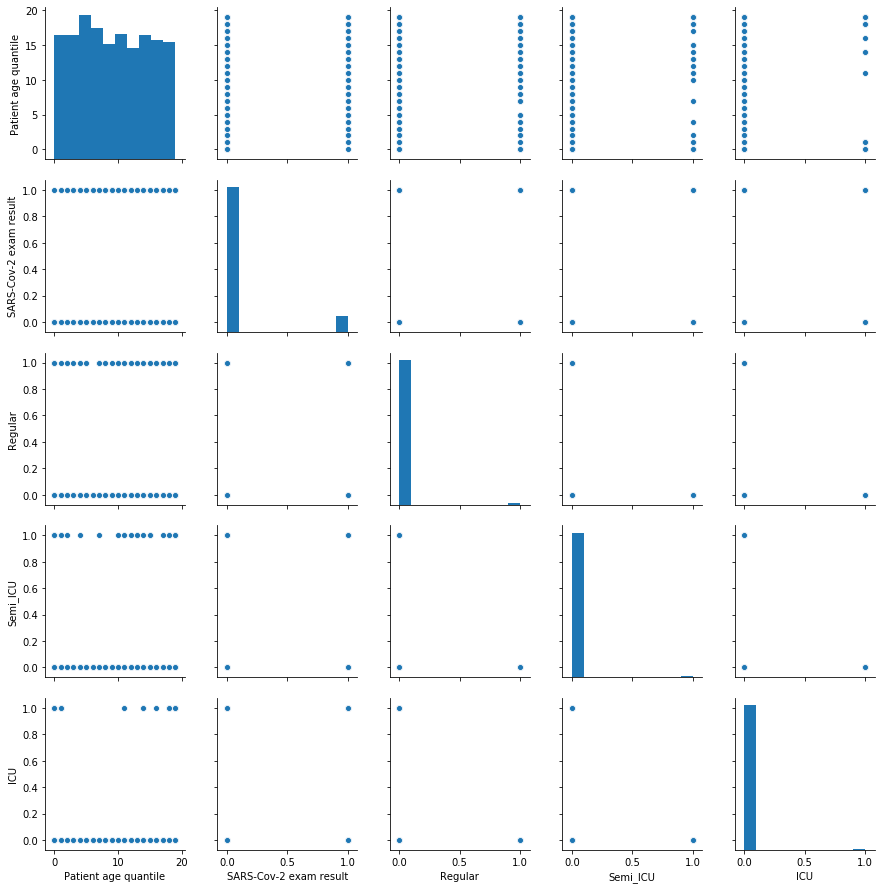

In [33]:
sns.pairplot(df)

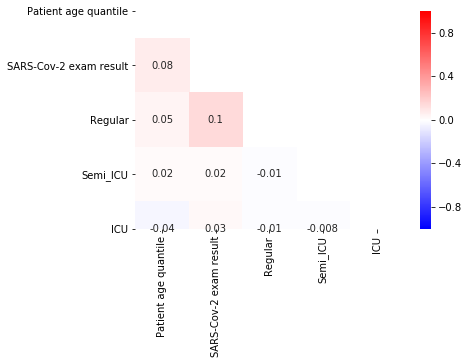

In [34]:
sns.heatmap(df.corr(), vmax=1, vmin=-1, annot=True, fmt='.1g', cmap='bwr', mask=np.triu(df.corr()))

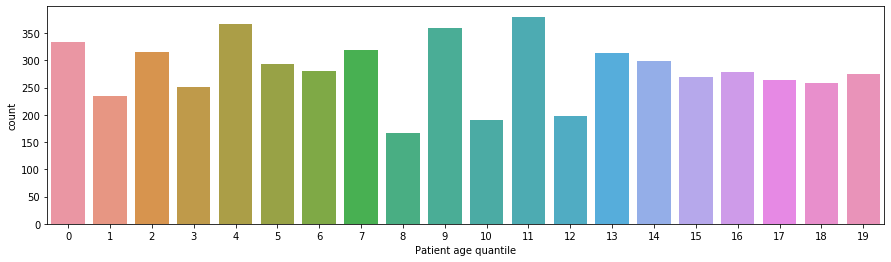

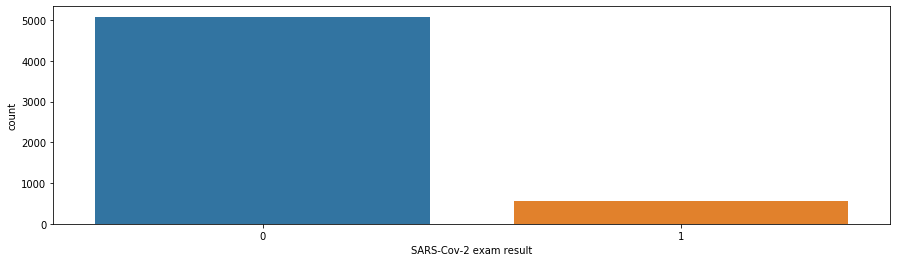

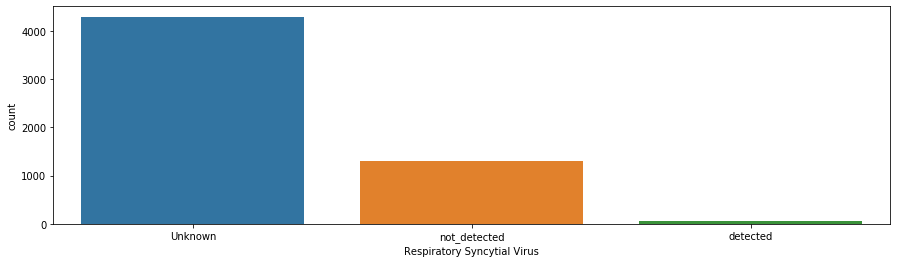

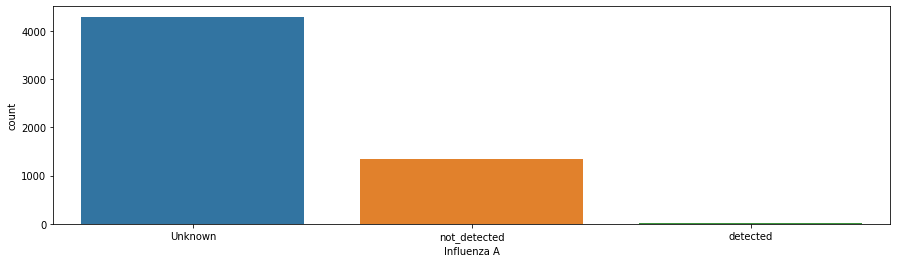

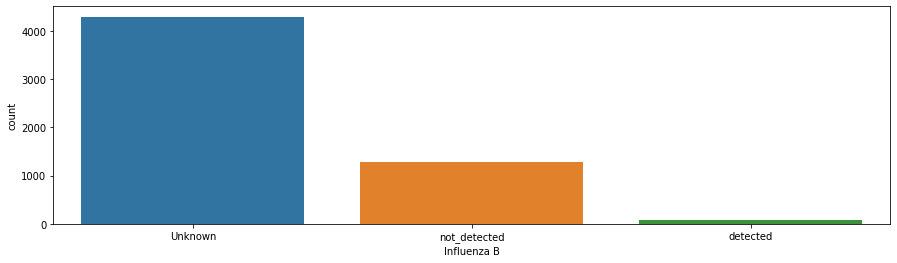

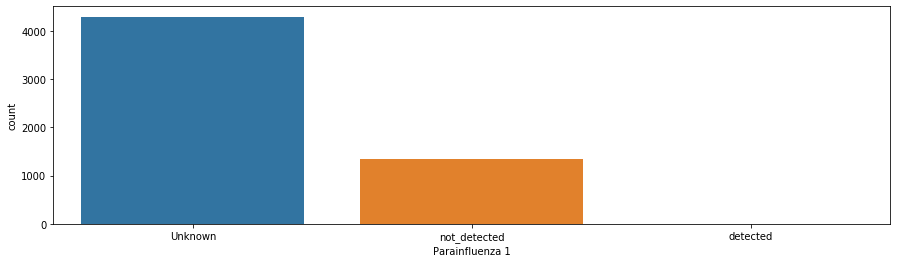

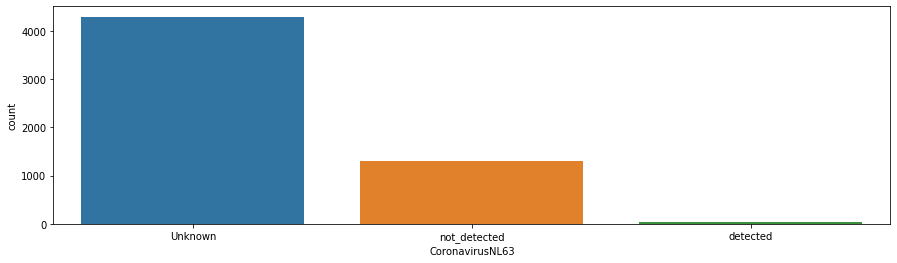

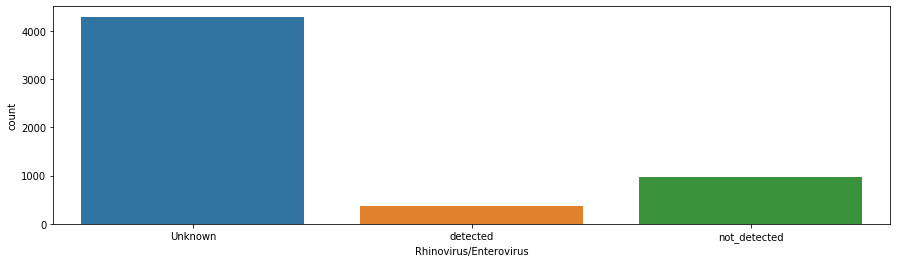

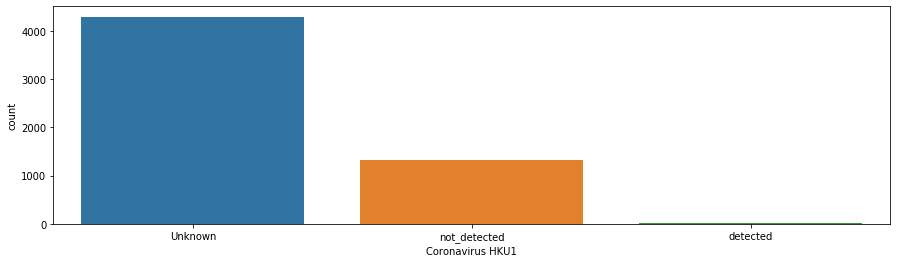

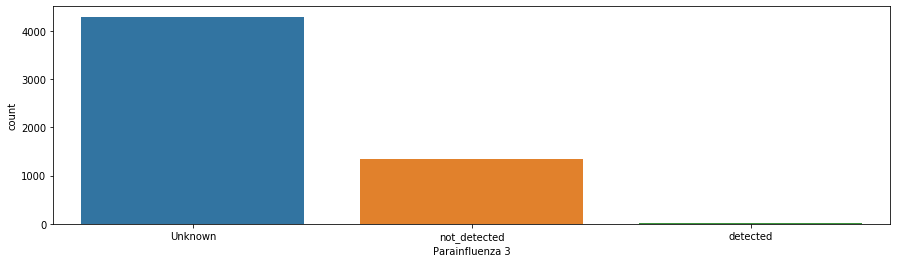

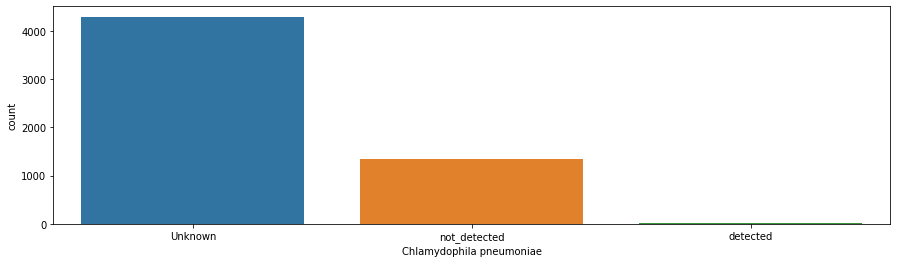

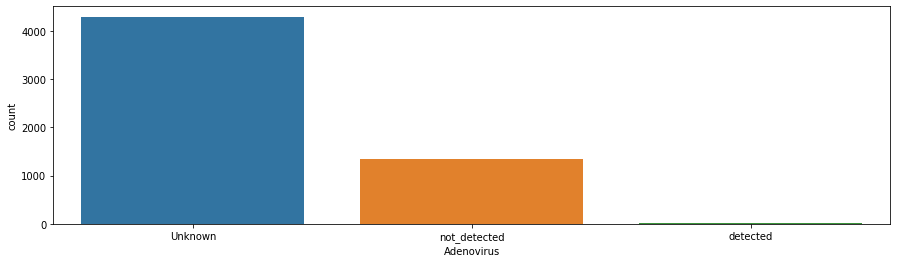

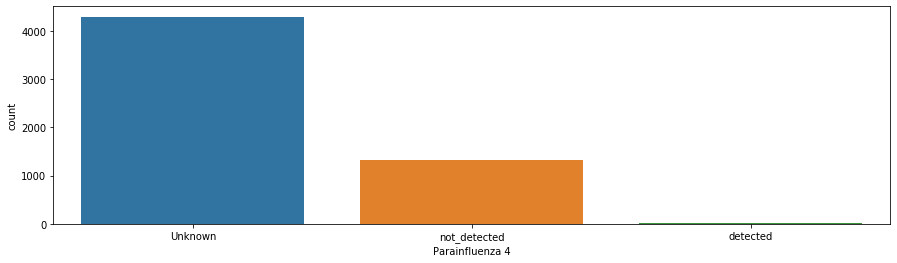

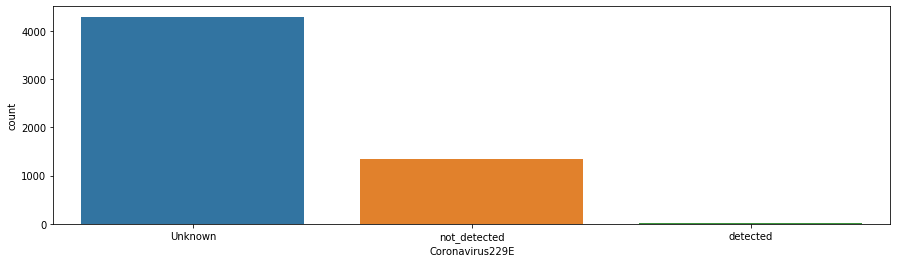

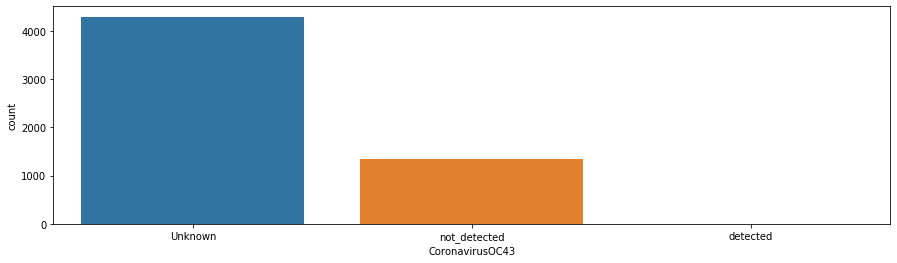

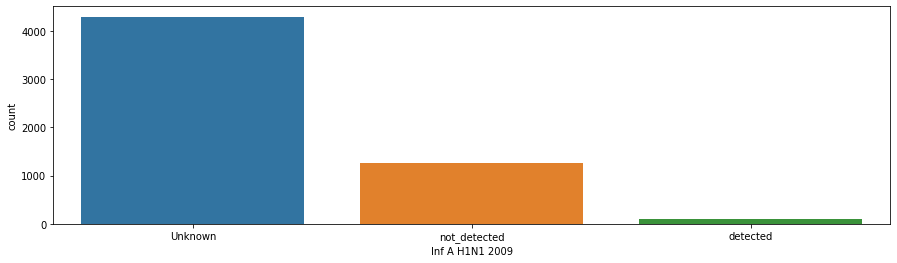

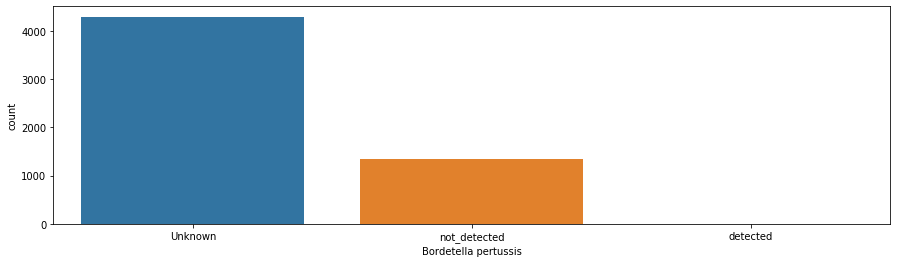

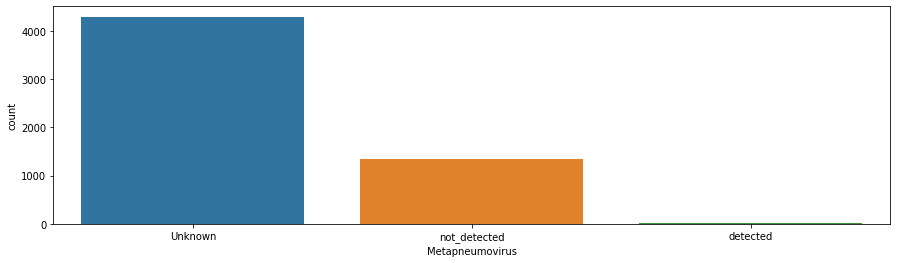

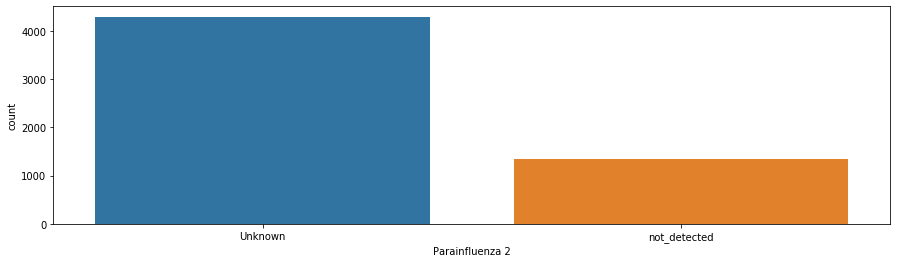

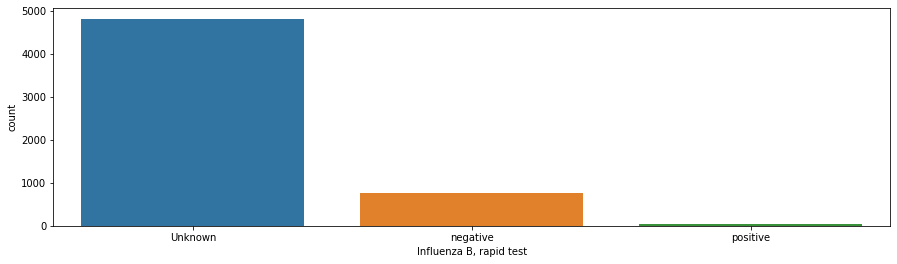

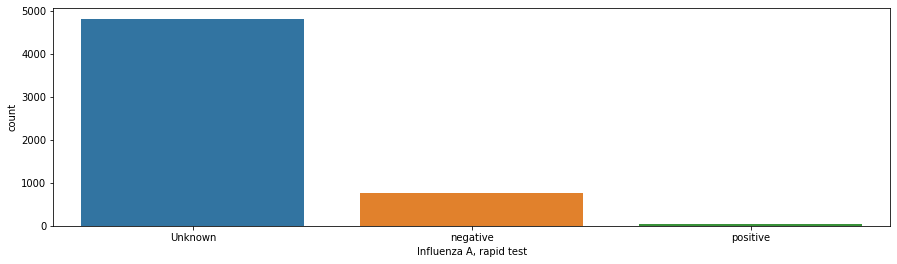

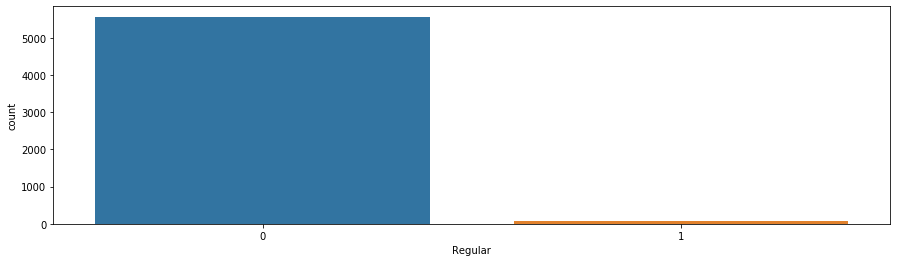

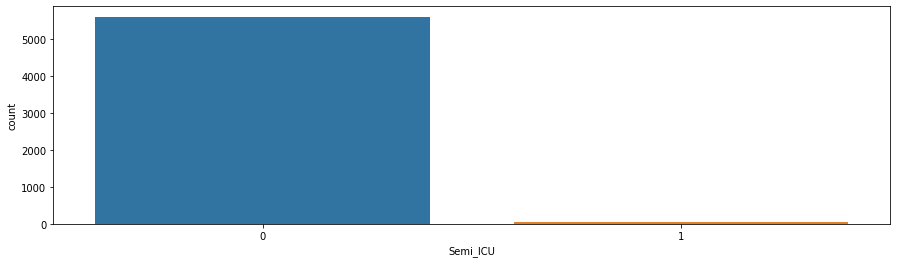

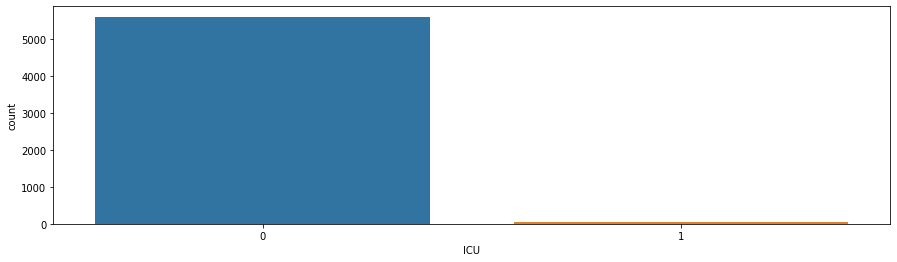

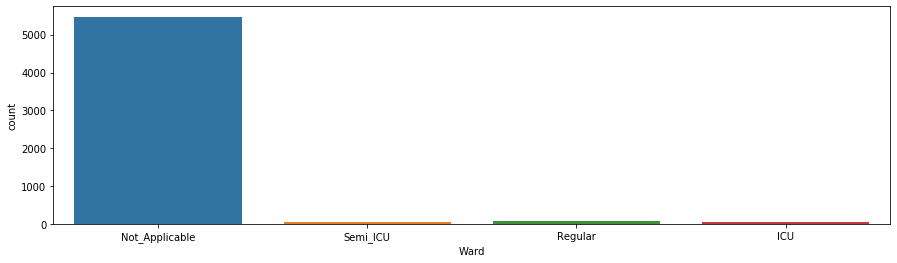

In [35]:
for i in df:
    plt.figure(figsize=(15,4))
    sns.countplot(x=i, data=df)

In [36]:
df.columns

Index(['Patient age quantile', 'SARS-Cov-2 exam result',
       'Respiratory Syncytial Virus', 'Influenza A', 'Influenza B',
       'Parainfluenza 1', 'CoronavirusNL63', 'Rhinovirus/Enterovirus',
       'Coronavirus HKU1', 'Parainfluenza 3', 'Chlamydophila pneumoniae',
       'Adenovirus', 'Parainfluenza 4', 'Coronavirus229E', 'CoronavirusOC43',
       'Inf A H1N1 2009', 'Bordetella pertussis', 'Metapneumovirus',
       'Parainfluenza 2', 'Influenza B, rapid test', 'Influenza A, rapid test',
       'Regular', 'Semi_ICU', 'ICU', 'Ward'],
      dtype='object')

In [37]:
df[(df['SARS-Cov-2 exam result']==0) & (df['Coronavirus HKU1']=='Unknown')]

,Patient age quantile,SARS-Cov-2 exam result,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus HKU1,Parainfluenza 3,...,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,"Influenza B, rapid test","Influenza A, rapid test",Regular,Semi_ICU,ICU,Ward
0,13,0,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,0,0,0,Not_Applicable
2,8,0,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,0,0,0,Not_Applicable
3,5,0,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,0,0,0,Not_Applicable
5,9,0,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,0,0,0,Not_Applicable
6,13,0,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,0,0,0,Not_Applicable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5637,12,0,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,0,0,0,Not_Applicable
5638,14,0,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,0,0,0,Not_Applicable
5640,17,0,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,0,0,0,Not_Applicable
5641,4,0,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,0,0,0,Not_Applicable


In [38]:
df[(df['SARS-Cov-2 exam result']==1) & (df['Ward']=='Not_Applicable')]

,Patient age quantile,SARS-Cov-2 exam result,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus HKU1,Parainfluenza 3,...,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,"Influenza B, rapid test","Influenza A, rapid test",Regular,Semi_ICU,ICU,Ward
67,7,1,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,0,0,0,Not_Applicable
513,10,1,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,...,not_detected,not_detected,not_detected,not_detected,Unknown,Unknown,0,0,0,Not_Applicable
568,2,1,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,...,not_detected,not_detected,not_detected,not_detected,Unknown,Unknown,0,0,0,Not_Applicable
676,15,1,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,0,0,0,Not_Applicable
1011,7,1,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,0,0,0,Not_Applicable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5632,16,1,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,0,0,0,Not_Applicable
5633,4,1,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,0,0,0,Not_Applicable
5634,15,1,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,0,0,0,Not_Applicable
5639,3,1,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,0,0,0,Not_Applicable


# Task 1 :: Predict SARS

In [39]:
x = df.drop(columns=['SARS-Cov-2 exam result', 'Ward'], axis=1)
y = df['SARS-Cov-2 exam result']

In [41]:
x = pd.get_dummies(x)
x.columns

Index(['Patient age quantile', 'Regular', 'Semi_ICU', 'ICU',
       'Respiratory Syncytial Virus_Unknown',
       'Respiratory Syncytial Virus_detected',
       'Respiratory Syncytial Virus_not_detected', 'Influenza A_Unknown',
       'Influenza A_detected', 'Influenza A_not_detected',
       'Influenza B_Unknown', 'Influenza B_detected',
       'Influenza B_not_detected', 'Parainfluenza 1_Unknown',
       'Parainfluenza 1_detected', 'Parainfluenza 1_not_detected',
       'CoronavirusNL63_Unknown', 'CoronavirusNL63_detected',
       'CoronavirusNL63_not_detected', 'Rhinovirus/Enterovirus_Unknown',
       'Rhinovirus/Enterovirus_detected',
       'Rhinovirus/Enterovirus_not_detected', 'Coronavirus HKU1_Unknown',
       'Coronavirus HKU1_detected', 'Coronavirus HKU1_not_detected',
       'Parainfluenza 3_Unknown', 'Parainfluenza 3_detected',
       'Parainfluenza 3_not_detected', 'Chlamydophila pneumoniae_Unknown',
       'Chlamydophila pneumoniae_detected',
       'Chlamydophila pneumon

In [42]:
# Instantiate and scale the data
ss=StandardScaler()
x=ss.fit_transform(x)

In [43]:
# Instanstiate PCA
pca=PCA(n_components=10)
x=pca.fit_transform(x)
x.shape

(5644, 10)

### Machine Learning Algorithms

In [44]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print('x_train.shape -->',x_train.shape,'| x_test.shape -->',x_test.shape,'\ny_train.shape -->',y_train.shape,'| y_test.shape -->',y_test.shape)

x_train.shape --> (4515, 10) | x_test.shape --> (1129, 10) 
y_train.shape --> (4515,) | y_test.shape --> (1129,)


In [45]:
# Instantiate all models
logr = LogisticRegression()
gnb = GaussianNB()
svc = SVC()
knn = KNeighborsClassifier()
dtc = DecisionTreeClassifier()
xgb = XGBClassifier()
rf = RandomForestClassifier()
bgc = BaggingClassifier()
etc = ExtraTreesClassifier()
gbc = GradientBoostingClassifier()

In [46]:
models={'Logistic Regression':logr,
        'Gaussian NB':gnb,
        'Support Vector Machine':svc,
        'KNeighbors Classifier':knn,
        'Decision Tree Classifier':dtc,
        'XGB Classifier':xgb,
        'Random Forest Classifier':rf,
        'Bagging Classifier':bgc,
        'Extra Trees Classifier':etc,
        'Gradient Boosting Classifier':gbc
       }

In [47]:
def main(cls):
    a_scores=[]
    for model_name,model in cls.items():
        model.fit(x_train,y_train)
        y_pred=model.predict(x_test)
        score=accuracy_score(y_test,y_pred)
        a_scores.append(score*100)
        print('##############################',model_name,'##############################')
        print('>>> Accuracy Score = %0.2f' %(score*100))
        c_matrix=confusion_matrix(y_test,y_pred)
        print('>>> Confusion Matrix: \n',c_matrix)
        TN,FP,FN,TP=c_matrix[0,0],c_matrix[0,1],c_matrix[1,0],c_matrix[1,1]
        print('>>> Recall Score = %0.2f' %((TP)*100/float(TP+FN)))
        print('>>> Specificity = %0.2f' %(TN*100/float(TN+FP)))
        print('>>> False Positive Rate = %0.2f' %(FP*100/float(FP+TN)))
        print('>>> Precision Score = %0.2f' %(TP*100/float(TP+FP)))
        print('>>> Classification Report:')
        print(classification_report(y_test,y_pred))
    return a_scores

In [48]:
a_scores=main(models)

############################## Logistic Regression ##############################
>>> Accuracy Score = 90.26
>>> Confusion Matrix: 
 [[1017    4]
 [ 106    2]]
>>> Recall Score = 1.85
>>> Specificity = 99.61
>>> False Positive Rate = 0.39
>>> Precision Score = 33.33
>>> Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95      1021
           1       0.33      0.02      0.04       108

    accuracy                           0.90      1129
   macro avg       0.62      0.51      0.49      1129
weighted avg       0.85      0.90      0.86      1129

############################## Gaussian NB ##############################
>>> Accuracy Score = 23.21
>>> Confusion Matrix: 
 [[170 851]
 [ 16  92]]
>>> Recall Score = 85.19
>>> Specificity = 16.65
>>> False Positive Rate = 83.35
>>> Precision Score = 9.76
>>> Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.17      0.

In [49]:
p=pd.DataFrame(data=a_scores,columns=['Accuracy Score'], index=list(models.keys())).sort_values(by = 'Accuracy Score', ascending=False)
print(p)

                              Accuracy Score
Support Vector Machine             90.434012
XGB Classifier                     90.434012
Random Forest Classifier           90.434012
Bagging Classifier                 90.434012
Gradient Boosting Classifier       90.434012
Extra Trees Classifier             90.345438
Logistic Regression                90.256864
Decision Tree Classifier           90.256864
KNeighbors Classifier              86.359610
Gaussian NB                        23.206377


In [50]:
new_models={'XGB Classifier':xgb,
            'Bagging Classifier':bgc,
            'Random Forest Classifier':rf,
            'Gradient Boosting Classifier':gbc
           }

In [51]:
cv_scores=[]
for model_name,model in new_models.items():
    score=cross_val_score(model,x_train,y_train,scoring='accuracy',cv=10)
    cv_scores.append((score.mean())*100)
    print(model_name,' >>> Completed')
print(cv_scores)

XGB Classifier  >>> Completed
Bagging Classifier  >>> Completed
Random Forest Classifier  >>> Completed
Gradient Boosting Classifier  >>> Completed
[90.18842101132195, 90.09982732570687, 90.05553048289936, 90.3212134293507]


In [52]:
pd.DataFrame(data=cv_scores, columns=['New Accuracy Score'], index=list(new_models.keys())).join(p)

,New Accuracy Score,Accuracy Score
XGB Classifier,90.188421,90.434012
Bagging Classifier,90.099827,90.434012
Random Forest Classifier,90.055530,90.434012
Gradient Boosting Classifier,90.321213,90.434012


We can see that we can achieve 90.43% accuracy using Random Forest Classifier.

## Hyperparameter Tuning

In [53]:
# Instantiating with default values
rf=RandomForestClassifier(random_state=42)

### GridSearchCV Hyperparameter Tuning

In [54]:
rf_param = {'n_estimators':range(50,251,50),
            'max_depth': range(5,16,2)
           }

b_rf=GridSearchCV(rf,rf_param)
b_rf.fit(x_train,y_train)
print('Random Forest Classifier >>>', b_rf.best_params_)

Random Forest Classifier >>> {'max_depth': 5, 'n_estimators': 50}


In [55]:
# Instantiating with new parameters
rf=RandomForestClassifier(random_state=42, n_estimators=50, max_depth=5)
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
score=accuracy_score(y_test,y_pred)
print('>>> Accuracy Score = %0.2f' %(score*100))

>>> Accuracy Score = 90.52


Conclusion:
    1. We were unable to achieve a better score using cross validation for Random Forest Classifier.
    2. By performing a gridsearch, we achieved a better score of 90.52%.
    3. Clearly, the model we are looking for is Random Forest Classifer.

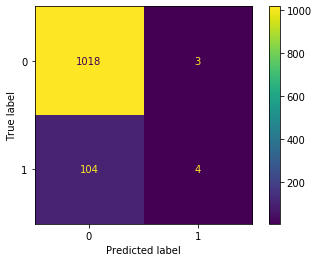

In [56]:
# Plotting Confusion Matrix
rf.fit(x_train,y_train)
plot_confusion_matrix(rf, x_test, y_test)

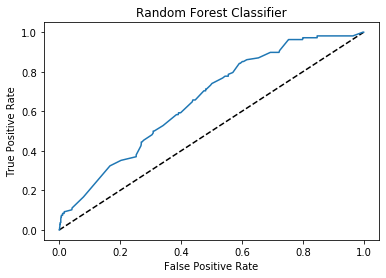

In [57]:
# Plotting ROC Curve for the model
y_pred_prob=rf.predict_proba(x_test)[:,1]  #1 is the probabilty of threshold value
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Random Forest Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Classifier')
plt.show()

In [58]:
#Exporting model as pkl file
joblib.dump(rf,'RF_Brazil_Covid19.pkl')

['RF_Brazil_Covid19.pkl']